In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install -U tensorflow==2.0 --quiet

1. Data fetching and understand the train/val/test splits 

In [63]:
!pip install h5py

In [0]:
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
path_files = '/content/drive/My Drive/Neural Networks/Project - 2/'

fileName = 'SVHN_single_grey1-2.h5'

In [0]:
f = h5py.File(name = (path_files + fileName), mode = 'r')

In [67]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_train = f.get('X_train').value
y_train = f.get('y_train').value

X_test = f.get('X_test').value
y_test = f.get('y_test').value

X_val = f.get('X_val').value
y_val = f.get('y_val').value

In [69]:
type(X_train)

numpy.ndarray

In [70]:
X_train.shape

(42000, 32, 32)

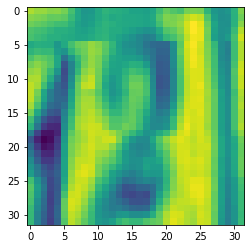

In [71]:
import matplotlib.pyplot as plt
img_num = np.random.randint(0, X_train.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_train[img_num]) #Show the image from test dataset
#plt.suptitle('Number: ' + str(X_train[img_num]))
plt.show()

In [72]:
y_train[img_num]

2

In [73]:
np.unique(y_train, axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [74]:
X_test.shape

(18000, 32, 32)

In [75]:
X_val.shape

(60000, 32, 32)

Convert Labels to One Hot Encoding

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes = 10)
testY = tf.keras.utils.to_categorical(y_test, num_classes = 10)
valY = tf.keras.utils.to_categorical(y_val , num_classes = 10)

2. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) 

In [0]:
#Clear out the tensorflow Memory
tf.keras.backend.clear_session()

#Initialize the sequence model
model = tf.keras.Sequential()

#Reshape data from 2-D to 1-D --> 32 * 32 pixels = 1024
model.add(tf.keras.layers.Reshape((1024,), input_shape = (32,32,)))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Layers

#Layer - 1
model.add(tf.keras.layers.Dense(180, activation = 'relu', name = 'Layer_1'))
model.add(tf.keras.layers.BatchNormalization())

#Layer - 2
model.add(tf.keras.layers.Dense(150, activation = 'relu', name = 'Layer_2'))
model.add(tf.keras.layers.BatchNormalization())



In [0]:
#Output Layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

Compile Model

In [0]:
model.compile(
                optimizer = 'sgd',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
            )

Model Training

In [81]:
hist_model = model.fit(
                          X_train, trainY,
                          validation_data = (X_val, valY),
                          epochs = 25,
                          batch_size = 32
                      )

Train on 42000 samples, validate on 60000 samples
Epoch 1/25
42000/42000 [==============================] - 9s 212us/sample - loss: 1.5807 - accuracy: 0.4769 - val_loss: 1.0951 - val_accuracy: 0.6616
Epoch 2/25
42000/42000 [==============================] - 8s 188us/sample - loss: 1.1188 - accuracy: 0.6433 - val_loss: 0.9085 - val_accuracy: 0.7261
Epoch 3/25
42000/42000 [==============================] - 8s 190us/sample - loss: 0.9783 - accuracy: 0.6887 - val_loss: 0.9191 - val_accuracy: 0.7144
Epoch 4/25
42000/42000 [==============================] - 8s 190us/sample - loss: 0.9028 - accuracy: 0.7139 - val_loss: 0.7092 - val_accuracy: 0.7886
Epoch 5/25
42000/42000 [==============================] - 8s 195us/sample - loss: 0.8403 - accuracy: 0.7332 - val_loss: 0.7077 - val_accuracy: 0.7859
Epoch 6/25
42000/42000 [==============================] - 8s 187us/sample - loss: 0.7954 - accuracy: 0.7495 - val_loss: 0.6439 - val_accuracy: 0.8086
Epoch 7/25
42000/42000 [==========================

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 180)               184500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 180)               720       
_________________________________________________________________
Layer_2 (Dense)              (None, 150)               27150     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [83]:
hist_model.history

{'accuracy': [0.47688094,
  0.6433333,
  0.6886905,
  0.71390474,
  0.7332381,
  0.7495476,
  0.7592619,
  0.7682857,
  0.77402383,
  0.78052384,
  0.7894286,
  0.7910238,
  0.79795235,
  0.80288094,
  0.8044286,
  0.8057857,
  0.8100238,
  0.81719047,
  0.8174286,
  0.8169524,
  0.8221667,
  0.8244524,
  0.8257619,
  0.82838094,
  0.8328095],
 'loss': [1.5807209496271042,
  1.1188261352266584,
  0.9782694742111933,
  0.9028262522334144,
  0.8402633253506252,
  0.7954151608830407,
  0.762770913146791,
  0.7379624545233591,
  0.7125913106259846,
  0.6905914227962494,
  0.6697278463954017,
  0.6578618374552045,
  0.6426245648293268,
  0.6248823060535249,
  0.6163380779765901,
  0.6087916656448727,
  0.5997245256219591,
  0.5787055883861724,
  0.5794315290110452,
  0.5743965248493921,
  0.5574782673971994,
  0.5561930925051372,
  0.5444656338691711,
  0.5385379004251389,
  0.5283163031623477],
 'val_accuracy': [0.6616167,
  0.72606665,
  0.7144333,
  0.78856665,
  0.7858833,
  0.8085667,


Model Evaluation

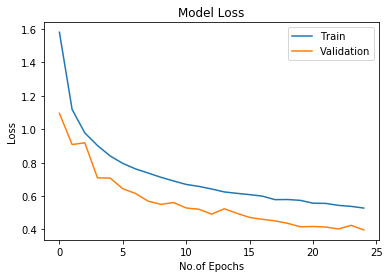

In [84]:
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('Model Loss')

plt.ylabel('Loss')
plt.xlabel('No.of Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

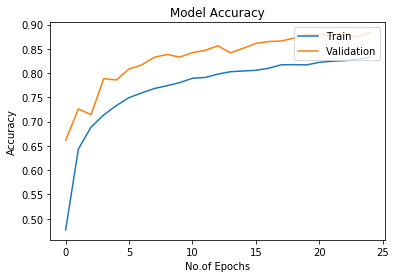

In [85]:
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('No.of Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

Observations From Loss and Accuracy Curves

1. Validation Loss has more fluctuations when compared to training loss
2. Training Accuracy has more fluctuations when compared to validation accuracy.

In [86]:
model.evaluate(X_test, testY, batch_size = 32)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5366128027041753, 0.84394443]

Predictions

In [0]:
predictions = model.predict(tf.cast(X_test, tf.float32))